In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tables import open_file

In [4]:
resukt = []
energies = []
with open_file('result_detail.hdf5') as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "deposit")
        energy = table.attrs["values_macros_energy"]
        number = table.attrs["values_macros_number"]
        data = table.read()
        data = data["event"].sum(axis=0) / number
        resukt.append(data)
        energies.append(energy)
data = np.array(resukt) #сразу разбиты на 20 шайб
energies = np.array(energies) #энергии протонов, от 60 до 80 МэВ с шагом 0.05 МэВ

In [21]:
np.where((data[:, 10] < 0.1)&(data[:, 9] > 0.1))

(array([147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
        199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
        212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
        225], dtype=int64),)

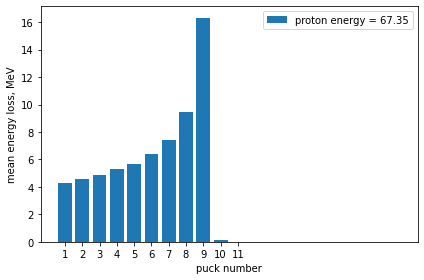

In [10]:
n = 147
plt.bar(range(1, 21), data[n], label='proton energy = ' + str(round(energies[n], 3)))
plt.legend()
plt.xticks(range(1, 12))
plt.ylabel("mean energy loss, MeV")
plt.xlabel('puck number')
plt.tight_layout()
#plt.savefig('min_max_energy_plots/losses_min_energy_lower.png', dpi=300, transparent=True)

In [114]:
energies[156], energies[225]

(67.79999999999956, 71.24999999999936)

In [125]:
energies[147], energies[225]

(67.34999999999958, 71.24999999999936)

In [35]:
71.8-67.8, 236-156

(4.0, 80)

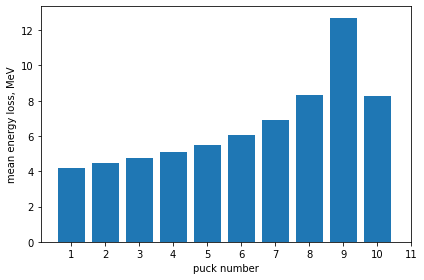

In [8]:
data_mean = np.mean(data[147:225], axis=0)
plt.bar(range(1, 11), data_mean[:10])
plt.xticks(range(1, 12))
plt.ylabel("mean energy loss, MeV")
plt.xlabel('puck number')
plt.tight_layout()
#plt.savefig('min_max_energy_plots/losses_mean_lower.png', dpi=300, transparent=True)

In [9]:
data_mean[:10]

array([ 4.20692899,  4.45435619,  4.75310494,  5.09263073,  5.51022293,
        6.06135262,  6.89119408,  8.34744189, 12.71444803,  8.27174899])

In [23]:
mean_error=np.loadtxt('popts_small.txt') #mean and error of gaussian for each puck for small data sample

In [24]:
calibr = data_mean[:10]/mean_error.T[0]

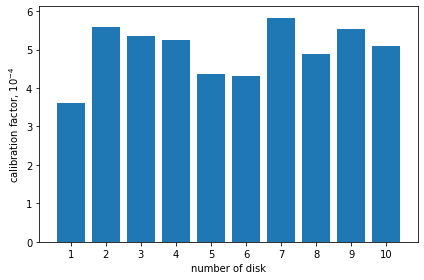

In [25]:
plt.bar(range(1, 11), calibr*10**4)
plt.xticks(range(1, 11))
plt.ylabel(r"calibration factor, $10^{-4}$")
plt.xlabel('number of disk')
plt.tight_layout()
#plt.savefig('min_max_energy_plots/calibr_lower.png', dpi=300, transparent=True)

In [12]:
np.savetxt('calibration_from_min_max_small_sample.txt', calibr)

In [9]:
np.max(calibr)/np.min(calibr), calibr, np.var(calibr), np.mean(calibr), np.mean(calibr)/np.max(calibr), np.mean(calibr)/np.min(calibr)

(1.6165497527214128,
 array([0.00036224, 0.00056305, 0.0005438 , 0.00053602, 0.00043467,
        0.0004324 , 0.00058558, 0.00049497, 0.00056097, 0.00051295]),
 4.6168960007519725e-09,
 0.0005026639842645581,
 0.8584040820909068,
 1.3876529066391068)

In [26]:
np.max(calibr)/np.min(calibr), calibr, np.var(calibr), np.mean(calibr), np.mean(calibr)/np.max(calibr), np.mean(calibr)/np.min(calibr)

(1.6107486890136646,
 array([0.00036203, 0.00055916, 0.00053581, 0.0005253 , 0.00043597,
        0.00043144, 0.00058313, 0.00048836, 0.00055349, 0.00051029]),
 4.325049422354081e-09,
 0.0004984981291294559,
 0.8548601381984717,
 1.3769648468932285)

In [10]:
calibration = np.zeros(16)
for i in range(16):
    calibration[i] = np.loadtxt("calibration/sigma_coefficient_puck_" + str(i) + ".txt")[0]

In [11]:
calibr/calibration[:10]

array([2.73640878, 3.17085393, 2.9860713 , 3.09018401, 2.93945882,
       2.65301964, 3.09632699, 3.00566031, 3.78193902, 3.27149719])

In [82]:
np.var(calibration[:10])

2.789492866959342e-10

In [83]:
np.max(calibration[:10])/np.min(calibration[:10])

1.4286414048612668

In [134]:
#np.savetxt('calibration_from_min_max_lower.txt', calibr)

In [3]:
calibr = np.loadtxt('calibration_from_min_max_lower.txt')

In [8]:
means = calibr*mean_error.T[0]

In [7]:
np.savetxt('means_calibrated.txt', means)

<BarContainer object of 10 artists>

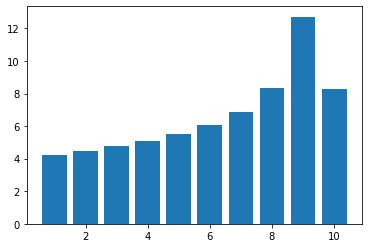

In [5]:
plt.bar(range(1,11), means)

In [9]:
errors = calibr*mean_error.T[1]

<BarContainer object of 10 artists>

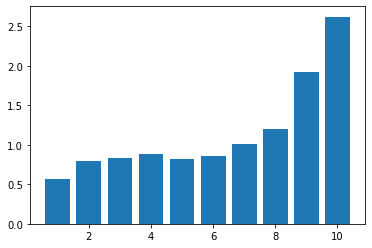

In [10]:
plt.bar(range(1,11), errors)

In [11]:
np.savetxt('errors_calibrated.txt', errors)

In [22]:
data_experiment1 = np.load("integrals_sorted_50Hz_10pucks.npy")
data_experiment2 = np.load("integrals_sorted_50Hz_6pucks.npy")
data_experiment3 = np.load("integrals_sorted_10pucks.npy")
data_experiment4 = np.load("integrals_sorted_6pucks.npy")
data_experiment = np.load("processed_data_10pucks.npy")

In [70]:
len(data_experiment1), len(data_experiment2), len(data_experiment3), len(data_experiment4), len(data_experiment.T)

(5625, 6985, 716, 873, 5191)

In [76]:
len(data_experiment2[:, 0][data_experiment2[:, 0]>0]), len(data_experiment.T)

(5880, 5191)

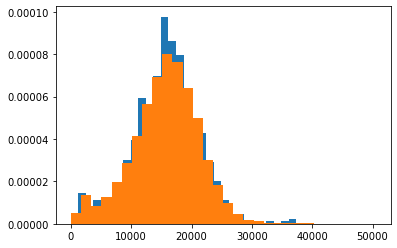

In [84]:
#for i in range(10):
plt.hist(data_experiment3[:, 0][data_experiment3[:, 0]>0], bins=30, density=True)
#plt.hist(data_experiment2[:, 0][data_experiment2[:, 0]>0], bins=30, density=True)
plt.hist(data_experiment[9], bins=30, density=True)
plt.show()

In [35]:
data_experiment1[:, 0].shape

(5625,)

In [61]:
i=9

In [62]:
np.histogram(data_experiment2[:, i], bins=30, density=True)[1][np.argmax(np.histogram(data_experiment2[:, i], bins=30, density=True)[0])+1]

11993.459331615973

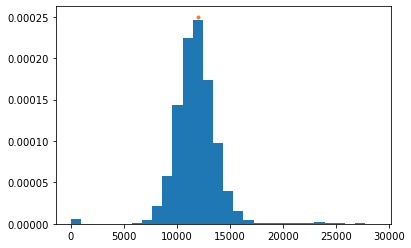

In [63]:
plt.hist(data_experiment2[:, i][data_experiment2[:, i]<30000], bins=30, density=True)
plt.plot(11993, 25*1e-5, '.')

<BarContainer object of 10 artists>

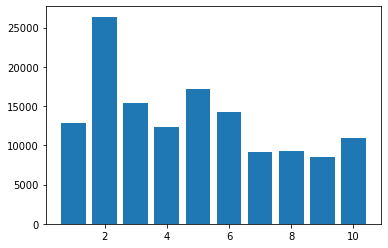

In [86]:
plt.bar(range(1,11), data_experiment1[0])


<BarContainer object of 10 artists>

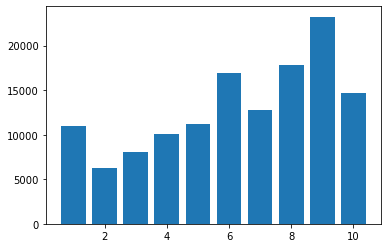

In [88]:
plt.bar(range(1,11), data_experiment.T[0])